In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
import joblib
from google.colab import files

In [88]:
df = pd.read_csv('pl-tables.csv')
df.head()

,season_end_year,team,position,played,won,drawn,lost,gf,ga,gd,points,notes
0,1993,Manchester Utd,1,42,24,12,6,67,31,36,84,→ Champions League via league finish
1,1993,Aston Villa,2,42,21,11,10,57,40,17,74,→ UEFA Cup via league finish
2,1993,Norwich City,3,42,21,9,12,61,65,-4,72,→ UEFA Cup via league finish 1
3,1993,Blackburn,4,42,20,11,11,68,46,22,71,NaN
4,1993,QPR,5,42,17,12,13,63,55,8,63,NaN


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 646 entries, 0 to 645
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   season_end_year  646 non-null    int64 
 1   team             646 non-null    object
 2   position         646 non-null    int64 
 3   played           646 non-null    int64 
 4   won              646 non-null    int64 
 5   drawn            646 non-null    int64 
 6   lost             646 non-null    int64 
 7   gf               646 non-null    int64 
 8   ga               646 non-null    int64 
 9   gd               646 non-null    int64 
 10  points           646 non-null    int64 
 11  notes            326 non-null    object
dtypes: int64(10), object(2)
memory usage: 60.7+ KB


In [90]:
#Check again for missing values and duplicate values
print(df.isnull().sum())
print(df.duplicated().sum())

season_end_year      0
team                 0
position             0
played               0
won                  0
drawn                0
lost                 0
gf                   0
ga                   0
gd                   0
points               0
notes              320
dtype: int64
0


In [91]:
#target column
df["Winner"] = np.where(df["position"] == 1, 1, 0)

In [92]:
X = df.drop(columns=["season_end_year", "team", "position", "notes", "Winner"])
y = df["Winner"]

In [93]:
#Checking correlation
corr = df.corr(numeric_only=True)
print(corr)

                 season_end_year  position        played       won     drawn  \
season_end_year     1.000000e+00 -0.027056 -5.213375e-01  0.024969 -0.310769   
position           -2.705639e-02  1.000000  5.189803e-02 -0.921046  0.167674   
played             -5.213375e-01  0.051898  1.000000e+00  0.033234  0.281005   
won                 2.496938e-02 -0.921046  3.323421e-02  1.000000 -0.339328   
drawn              -3.107693e-01  0.167674  2.810051e-01 -0.339328  1.000000   
lost                2.654001e-02  0.898856  3.532471e-02 -0.869715 -0.123596   
gf                  5.779955e-02 -0.799952  7.031660e-02  0.881859 -0.239781   
ga                  6.737788e-02  0.802300  8.196921e-02 -0.772493 -0.007929   
gd                 -3.948655e-17 -0.906277 -2.476144e-17  0.940584 -0.141878   
points             -3.132009e-02 -0.934208  8.580798e-02  0.984925 -0.174116   
Winner              3.307677e-03 -0.375628 -6.344598e-03  0.499827 -0.200309   

                     lost        gf    

In [94]:
target_corr = corr["Winner"].sort_values(ascending=False)
print("Correlation with Winner:\n", target_corr)

Correlation with Winner:
 Winner             1.000000
won                0.499827
points             0.486406
gf                 0.468221
gd                 0.463817
season_end_year    0.003308
played            -0.006345
drawn             -0.200309
ga                -0.342037
position          -0.375628
lost              -0.423053
Name: Winner, dtype: float64


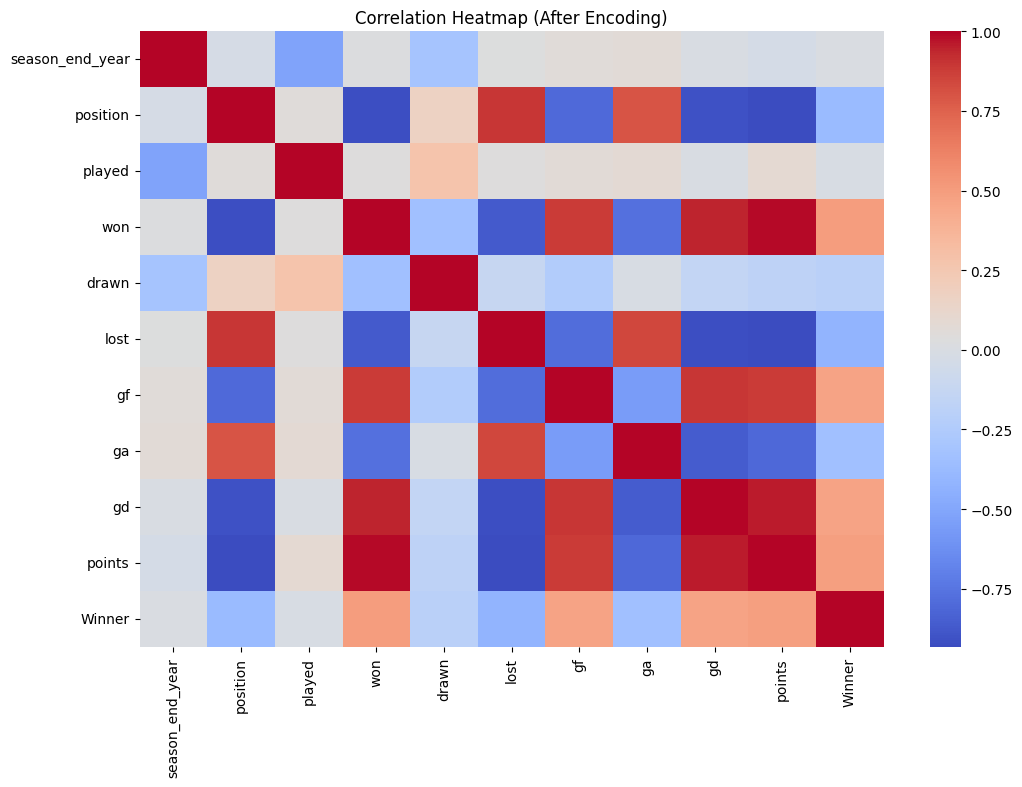

In [95]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap (After Encoding)")
plt.show()

In [96]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [97]:
rf_model = RandomForestClassifier(n_estimators=500, random_state=42, class_weight="balanced")
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=500,
                       random_state=42)

In [98]:
log_model = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000, class_weight="balanced"))
])
log_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [99]:
rf_preds = rf_model.predict(X_test)
log_preds = log_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))
print(classification_report(y_test, rf_preds))

print("Logistic Regression Accuracy:", accuracy_score(y_test, log_preds))
print(classification_report(y_test, log_preds))

Random Forest Accuracy: 0.9692307692307692
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       124
           1       0.75      0.50      0.60         6

    accuracy                           0.97       130
   macro avg       0.86      0.75      0.79       130
weighted avg       0.97      0.97      0.97       130

Logistic Regression Accuracy: 0.9538461538461539
              precision    recall  f1-score   support

           0       1.00      0.95      0.98       124
           1       0.50      1.00      0.67         6

    accuracy                           0.95       130
   macro avg       0.75      0.98      0.82       130
weighted avg       0.98      0.95      0.96       130



In [100]:
joblib.dump(rf_model, "league_model.pkl")
files.download("league_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>